In [ ]:
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install glob
%pip install pathlib

In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from pathlib import Path

In [131]:
results_dataset = "./results/2025Assembly-DL.csv"
df = pd.read_csv(results_dataset)

print('='*50)
print(f"{df.loc[0, 'election_year']} {df.loc[0, 'election_state']} {df.loc[0, 'election_type']} Election Results")
print('='*50)

df['total_votes'] = df['evm_votes'] + df['postal_votes']
df.drop(['election_year', 'election_type'], axis=1, inplace=True)

display(df)

2025 DL Assembly Election Results


,election_state,constituency,serial_no,candidate,party,evm_votes,postal_votes,total_votes
0,DL,NERELA,1,ARUNA,Indian National Congress,6724,58,6782
1,DL,NERELA,2,RAJ KARAN KHATRI,Bharatiya Janata Party,86463,752,87215
2,DL,NERELA,3,SHARAD KUMAR,Aam Aadmi Party,78395,224,78619
3,DL,NERELA,4,ANIL KUMAR SINGH,Communist Party of India (Marxist-Leninist) (L...,328,0,328
4,DL,NERELA,5,MD KHALID,Aazad Samaj Party (Kanshi Ram),278,0,278
...,...,...,...,...,...,...,...,...
764,DL,KARAWAL NAGAR,12,H.M. HASHIM MALIK,Social Democratic Party Of India,491,0,491
765,DL,KARAWAL NAGAR,13,AJAY SINGH NEGI,Independent,1002,4,1006
766,DL,KARAWAL NAGAR,14,YOGESH SWAMY,Independent,228,1,229
767,DL,KARAWAL NAGAR,15,VISHAL SHARMA,Independent,173,0,173


In [132]:
print('='*50)
print("Political Affiliations including Independents")
print('='*50)
df['party'].value_counts()

Political Affiliations including Independents


party
Independent                             138
Indian National Congress                 70
Aam Aadmi Party                          70
None of the Above                        70
Bharatiya Janata Party                   68
                                       ... 
One Bharat Citizen Party                  1
Proutist Bloc, India                      1
Rashtravadi Loktantrik Party (India)      1
Bhartiya Krishak Dal                      1
Social Democratic Party Of India          1
Name: count, Length: 107, dtype: int64

In [133]:
top_n = 10

# Get top 2 candidates from each constituency
top_2_candidates = df.sort_values('total_votes', ascending=False).groupby('constituency').head(2)

# Create separate dataframes for winners and runners-up
winners = top_2_candidates.groupby('constituency').first().reset_index()
runners_up = top_2_candidates.groupby('constituency').last().reset_index()

# Combine winner and runner-up information
results = pd.DataFrame({
    'Constituency': winners['constituency'],
    'Candidate (Winner)': winners['candidate'],
    'Votes (Winner)': winners['total_votes'],
    'Party (Winner)': winners['party'],
    'Candidate (Runner-up)': runners_up['candidate'],
    'Votes (Runner-up)': runners_up['total_votes'],
    'Party (Runner-up)': runners_up['party'],
    'Margin': winners['total_votes'] - runners_up['total_votes']
})

print('='*80)
print(f"Top {top_n} Winning Candidates and Runners-up by Winner's Total Votes")
print('='*80)
results = results.sort_values('Votes (Winner)', ascending=False).reset_index(drop=True)

display(results.head(top_n))

Top 10 Winning Candidates and Runners-up by Winner's Total Votes


,Constituency,Candidate (Winner),Votes (Winner),Party (Winner),Candidate (Runner-up),Votes (Runner-up),Party (Runner-up),Margin
0,MATIALA,SANDEEP SEHRAWAT,146295,Bharatiya Janata Party,SUMESH SHOKEEN,117572,Aam Aadmi Party,28723
1,VIKASPURI,PANKAJ KUMAR SINGH,135564,Bharatiya Janata Party,MAHINDER YADAV,122688,Aam Aadmi Party,12876
2,BURARI,SANJEEV JHA,121181,Aam Aadmi Party,SHAILENDRA KUMAR,100580,Janata Dal (United),20601
3,BAWANA,RAVINDER INDRAJ SINGH,119515,Bharatiya Janata Party,JAI BHAGWAN UPKAR,88040,Aam Aadmi Party,31475
4,BADARPUR,RAM SINGH NETAJI,112991,Aam Aadmi Party,NARAYAN DUTT SHARMA,87103,Bharatiya Janata Party,25888
5,KARAWAL NAGAR,KAPIL MISHRA,107367,Bharatiya Janata Party,MANOJ KUMAR TYAGI,84012,Aam Aadmi Party,23355
6,KIRARI,ANIL JHA,105780,Aam Aadmi Party,BAJRANG SHUKLA,83909,Bharatiya Janata Party,21871
7,RITHALA,KULWANT RANA,104371,Bharatiya Janata Party,MOHINDER GOYAL,74755,Aam Aadmi Party,29616
8,UTTAM NAGAR,PAWAN SHARMA,103613,Bharatiya Janata Party,POSH BALYAN,73873,Aam Aadmi Party,29740
9,NAJAFGARH,NEELAM PAHALWAN,101708,Bharatiya Janata Party,TARUN KUMAR,72699,Aam Aadmi Party,29009


In [134]:
print('='*80)
print(f"Top {top_n} Winning Candidates and Runners-up by Winning Margin (smallest first)")
print('='*80)
results = results.sort_values('Margin', ascending=True).reset_index(drop=True)

display(results.head(top_n))

Top 10 Winning Candidates and Runners-up by Winning Margin (smallest first)


,Constituency,Candidate (Winner),Votes (Winner),Party (Winner),Candidate (Runner-up),Votes (Runner-up),Party (Runner-up),Margin
0,SANGAM VIHAR,CHANDAN KUMAR CHOUDHARY,54049,Bharatiya Janata Party,DINESH MOHANIYA,53705,Aam Aadmi Party,344
1,TRILOKPURI,RAVI KANT,58217,Bharatiya Janata Party,ANJANA PARCHA,57825,Aam Aadmi Party,392
2,JANGPURA,TARVINDER SINGH MARWAH,38859,Bharatiya Janata Party,MANISH SISODIA,38184,Aam Aadmi Party,675
3,TIMARPUR,SURYA PRAKASH KHATRI,55941,Bharatiya Janata Party,SURINDER PAL SINGH (BITTOO),54773,Aam Aadmi Party,1168
4,RAJINDER NAGAR,UMANG BAJAJ,46671,Bharatiya Janata Party,DURGESH PATHAK,45440,Aam Aadmi Party,1231
5,MEHRAULI,GAJENDER SINGH YADAV,48349,Bharatiya Janata Party,MAHENDER CHAUDHARY,46567,Aam Aadmi Party,1782
6,DELHI CANTT,VIRENDER SINGH KADIAN,22191,Aam Aadmi Party,BHUVAN TANWAR,20162,Bharatiya Janata Party,2029
7,MALVIYA NAGAR,SATISH UPADHYAY,39564,Bharatiya Janata Party,SOMNATH BHARTI,37433,Aam Aadmi Party,2131
8,GREATER KAILASH,SHIKHA ROY,49594,Bharatiya Janata Party,SAURABH BHARADWAJ,46406,Aam Aadmi Party,3188
9,KALKAJI,ATISHI,52154,Aam Aadmi Party,RAMESH BIDHURI,48633,Bharatiya Janata Party,3521


In [135]:
# Calculate deposit loss status directly using transform
df['deposit_lost'] = df['total_votes'] < (df.groupby('constituency')['total_votes'].transform('sum') / 6)

print('='*50)
print(f"Candidates who had to forfeit their deposit")
print('='*50)

# Display some examples to verify
display(df[['constituency', 'candidate', 'party', 'total_votes', 'deposit_lost']][df['deposit_lost'] == True].head(10))

Candidates who had to forfeit their deposit


,constituency,candidate,party,total_votes,deposit_lost
0,NERELA,ARUNA,Indian National Congress,6782,True
3,NERELA,ANIL KUMAR SINGH,Communist Party of India (Marxist-Leninist) (L...,328,True
4,NERELA,MD KHALID,Aazad Samaj Party (Kanshi Ram),278,True
5,NERELA,BUDIYA,Independent,242,True
6,NERELA,VIKAS BHARDWAJ,Independent,301,True
7,NERELA,NOTA,None of the Above,981,True
8,BURARI,GANGA RAM,Bahujan Samaj Party,2214,True
9,BURARI,MANGESH TYAGI,Indian National Congress,19920,True
11,BURARI,ANIL KAPOOR,Janhit Dal,869,True
12,BURARI,ABHISHEK KUMAR SINGH (MASTER JI),Rashtriya Janshakti Party (Secular),531,True


In [137]:
# First calculate deposit_lost if not already done
df['deposit_lost'] = df['total_votes'] < (df.groupby('constituency')['total_votes'].transform('sum') / 6)

# Find winners in each constituency
df['is_winner'] = df['total_votes'] == df.groupby('constituency')['total_votes'].transform('max')

# Calculate party-wise vote shares and other metrics
vote_shares = df.groupby('party').agg({
    'total_votes': 'sum',
    'deposit_lost': ['count', 'sum'],
    'is_winner': 'sum'  # Sum of True values gives number of seats won
}).reset_index()

# Flatten multi-level columns
vote_shares.columns = ['Party', 'Votes Won', 'Total Candidates', 'Deposits Lost', 'Seats Won']

# Calculate percentages
total_votes = df['total_votes'].sum()
vote_shares['Vote Share %'] = (vote_shares['Votes Won'] / total_votes * 100).round(2)
vote_shares['% Deposits Lost'] = (vote_shares['Deposits Lost'] / vote_shares['Total Candidates'] * 100).round(2)

# Set NOTA's deposit loss to null
vote_shares.loc[vote_shares['Party'] == 'None of the Above', '% Deposits Lost'] = None

# Sort by total votes and get display cutoff
vote_shares = vote_shares.sort_values('Votes Won', ascending=False)
nota_position = vote_shares[vote_shares['Party'] == 'None of the Above'].index[0]
display_upto = min(nota_position+1, top_n)

print('='*60)
print(f"Party-wise Performance: Seats Won and Vote Share")
print('='*60)

vote_shares.reset_index(drop=True, inplace=True)
columns_order = ['Party', 'Total Candidates', 'Seats Won', 'Votes Won', 'Vote Share %', '% Deposits Lost']
display(vote_shares[columns_order].head(display_upto))

Party-wise Performance: Seats Won and Vote Share


,Party,Total Candidates,Seats Won,Votes Won,Vote Share %,% Deposits Lost
0,Bharatiya Janata Party,68,48,4323110,45.56,0.00
1,Aam Aadmi Party,70,22,4133898,43.57,0.00
2,Indian National Congress,70,0,601922,6.34,95.71
3,Janata Dal (United),1,0,100580,1.06,0.00
4,All India Majlis-E-Ittehadul Muslimeen,2,0,73032,0.77,50.00
5,Bahujan Samaj Party,68,0,55066,0.58,100.00
6,None of the Above,70,0,53738,0.57,NaN
7,Lok Janshakti Party(Ram Vilas),1,0,50209,0.53,0.00
8,Independent,138,0,43833,0.46,100.00
9,Aazad Samaj Party (Kanshi Ram),14,0,8727,0.09,100.00


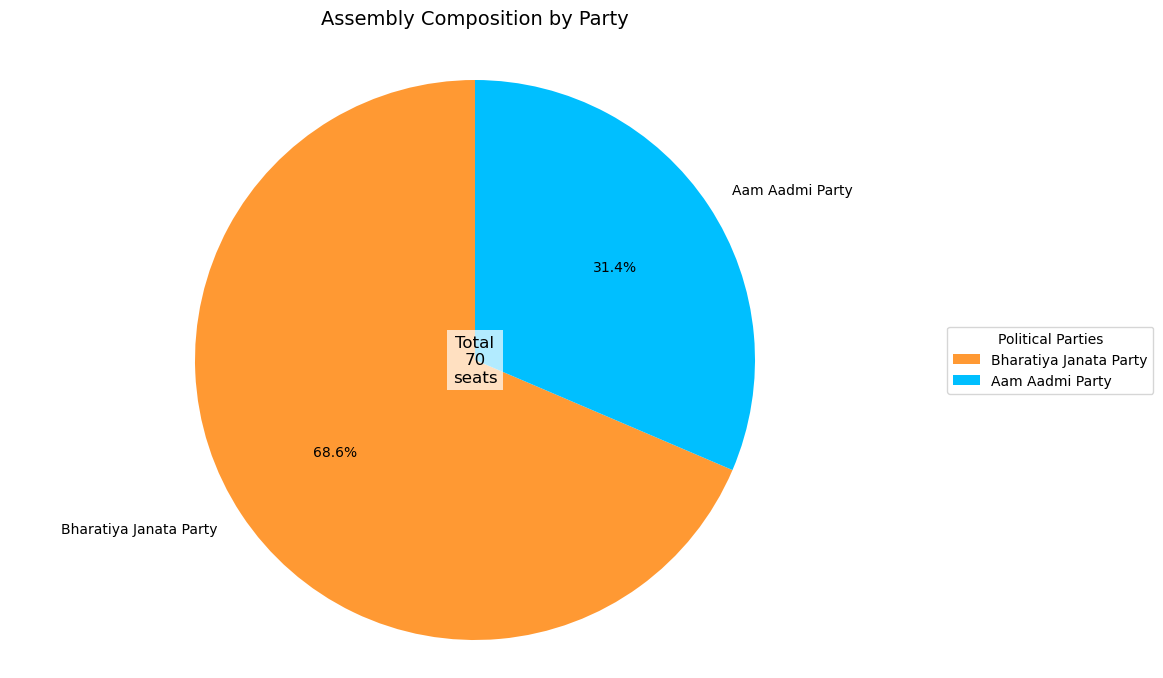


Numerical Breakdown:


,Party,Seats Won
0,Bharatiya Janata Party,48
1,Aam Aadmi Party,22


In [127]:
# Define party colors
party_colors = {
    'Bharatiya Janata Party': '#FF9933',        # Saffron
    'Aam Aadmi Party': '#00BFFF',               # Light Blue (Aam Aadmi Party)
    'Indian National Congress': '#2AAA8A',      # Green/Teal (Congress)
    'BSP': '#0000FF',      # Blue (Bahujan Samaj Party)
    'CPI': '#FF0000',      # Red (Communist Party)
    'CPI(M)': '#FF0000',   # Red (Communist Party Marxist)
    'NCP': '#006400',      # Dark Green (Nationalist Congress)
    'SP': '#006400',       # Dark Green (Samajwadi Party)
    'TMC': '#00FF00',      # Green (Trinamool Congress)
    'AITC': '#00FF00',     # Green (All India Trinamool Congress)
    'SHS': '#FF6600',      # Orange (Shiv Sena)
    'JD(U)': '#006400',    # Dark Green (Janata Dal United)
    'RJD': '#006400',      # Dark Green (Rashtriya Janata Dal)
}

# Get parties that won seats and sort by seats won
assembly_composition = vote_shares[vote_shares['Seats Won'] > 0][['Party', 'Seats Won']].sort_values('Seats Won', ascending=False)

# Get colors for each party, use gray for parties not in our color map
colors = [party_colors.get(party, '#808080') for party in assembly_composition['Party']]

# Create a pie chart
plt.figure(figsize=(12, 8))
plt.pie(assembly_composition['Seats Won'], 
        labels=assembly_composition['Party'],
        colors=colors,
        autopct='%1.1f%%',  # Show percentage with 1 decimal
        startangle=90)      # Rotate to start at top

plt.title('Assembly Composition by Party', pad=20, size=14)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Add total seats in the center
total_seats = assembly_composition['Seats Won'].sum()
plt.text(0, 0, f'Total\n{total_seats}\nseats', 
         ha='center', va='center', fontsize=12,
         bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))

# Add a legend
plt.legend(assembly_composition['Party'],
          title="Political Parties",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()

# Display the numerical breakdown
print("\nNumerical Breakdown:")
print("=" * 25)
display(assembly_composition)

In [70]:
df[['constituency', 'candidate', 'party', 'total_votes']].sort_values(by='total_votes', ascending=False).groupby('constituency').agg(list)

,candidate,party,total_votes
constituency,,,
ADARSH NAGAR,"[RAJ KUMAR BHATIA, MUKESH KUMAR GOEL, SHIVANK ...","[Bharatiya Janata Party, Aam Aadmi Party, Indi...","[52510, 41028, 5460, 377, 344, 140, 133, 116, ..."
AMBEDKAR NAGAR,"[DR. AJAY DUTT, KHUSHI RAM CHUNAR, JAI PRAKASH...","[Aam Aadmi Party, Bharatiya Janata Party, Indi...","[46285, 42055, 7172, 498, 397, 302, 261, 102, ..."
BABARPUR,"[GOPAL RAI, ANIL KUMAR VASHISHT, MOHD ISHRAQ K...","[Aam Aadmi Party, Bharatiya Janata Party, Indi...","[76192, 57198, 8797, 474, 201, 124, 93, 89, 76]"
BADARPUR,"[RAM SINGH NETAJI, NARAYAN DUTT SHARMA, ARJUN ...","[Aam Aadmi Party, Bharatiya Janata Party, Indi...","[112991, 87103, 3145, 1965, 915, 466, 367, 322..."
BADLI,"[AAHIR DEEPAK CHAUDHARYY, AJESH YADAV, DEVENDE...","[Bharatiya Janata Party, Aam Aadmi Party, Indi...","[61192, 46029, 41071, 725, 692, 250, 235, 214,..."
...,...,...,...
TUGHLAKABAD,"[SAHI RAM, ROHTASH KUMAR, VIRENDER SINGH, AMJA...","[Aam Aadmi Party, Bharatiya Janata Party, Indi...","[62155, 47444, 2313, 1606, 536, 323, 199, 143,..."
UTTAM NAGAR,"[PAWAN SHARMA, POSH BALYAN, MUKESH SHARMA, NOT...","[Bharatiya Janata Party, Aam Aadmi Party, Indi...","[103613, 73873, 15565, 1217, 991, 206, 196, 18..."
VIKASPURI,"[PANKAJ KUMAR SINGH, MAHINDER YADAV, JITENDER ...","[Bharatiya Janata Party, Aam Aadmi Party, Indi...","[135564, 122688, 8465, 2642, 1460, 687, 443, 4..."


In [71]:
sc = pd.read_csv('states.csv')
sc.rename(columns={'state_name': 'election_state'}, inplace=True)

display(sc)

,state_code,election_state,state_status,population,region,districts,assembly_seats,parliamentary_seats
0,AN,Andaman and Nicobar Islands,UT,380581,South,3,0,1
1,AP,Andhra Pradesh,State,49577103,South,26,175,25
2,AR,Arunachal Pradesh,State,1383727,Northeast,25,60,2
3,AS,Assam,State,31205576,Northeast,35,126,14
4,BR,Bihar,State,104099452,East,38,243,40
5,CH,Chandigarh,UT,1055450,Northwest,1,0,1
6,CT,Chhattisgarh,State,25545198,Central,33,90,11
7,DN,Dadra and Nagar Haveli and Daman and Diu,UT,586956,West,3,0,2
8,DL,NCT of Delhi,UT,16787941,Northwest,11,70,7
9,GA,Goa,State,1540000,West,2,40,2


In [79]:
# Get all Assembly CSV files from results directory
results_dir = Path('./results')
csv_files = glob.glob(str(results_dir / '*Assembly*.csv'))

# Read and concatenate all CSV files
df_master = pd.concat([pd.read_csv(f) for f in sorted(csv_files)], ignore_index=True)
df_master['total_votes'] = df_master['evm_votes'] + df_master['postal_votes']

print('='*60)
print(f"Master DataFrame of Election Results on India Votes Data")
print('='*60)

display(df_master)

Master DataFrame of Election Results on India Votes Data


,election_year,election_type,election_state,constituency,serial_no,candidate,party,evm_votes,postal_votes,total_votes
0,2024,Assembly,HR,KALKA,1,OM PARKASH GUJJAR,Aam Aadmi Party,854,4,858
1,2024,Assembly,HR,KALKA,2,CHARAN SINGH,Bahujan Samaj Party,1368,6,1374
2,2024,Assembly,HR,KALKA,3,PARDEEP CHAUDHARY,Indian National Congress,49544,185,49729
3,2024,Assembly,HR,KALKA,4,SHAKTI RANI SHARMA,Bharatiya Janata Party,60497,115,60612
4,2024,Assembly,HR,KALKA,5,AMIT SHARMA,Independent,582,0,582
...,...,...,...,...,...,...,...,...,...,...
8564,2025,Assembly,DL,KARAWAL NAGAR,12,H.M. HASHIM MALIK,Social Democratic Party Of India,491,0,491
8565,2025,Assembly,DL,KARAWAL NAGAR,13,AJAY SINGH NEGI,Independent,1002,4,1006
8566,2025,Assembly,DL,KARAWAL NAGAR,14,YOGESH SWAMY,Independent,228,1,229
8567,2025,Assembly,DL,KARAWAL NAGAR,15,VISHAL SHARMA,Independent,173,0,173
